# Test

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [22]:
from learn import *
sys.path.insert(0, 'code')
from v17 import *
from v17 import _internal_validate_predict_best_param
sys.path.insert(0, 'Pytorch-UNet/utils')
from crf import dense_crf

In [3]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 8
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [4,5,8,9]
torch.cuda.set_device(gpu_start)
bs = 8

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[3]

## Scripting

### Warning: update weight from 170 before starting

Without rescale

In [1]:
%%time
%run script 3 --num_gpus=1 --gpu_start=9 --bs=40 --pred --eval --num_slice 81 --model_name unet


Data finished loading: data/train/AOI_5_Khartoum_Train


0.4 0.293847
0.4444444444444445 0.303068
0.48888888888888893 0.314118
0.5333333333333333 0.321345
0.5777777777777778 0.329554
0.6222222222222222 0.332818
0.6666666666666667 0.343292
0.7111111111111111 0.352441
0.7555555555555555 0.356345
0.8 0.348012

CPU times: user 6h 38min 49s, sys: 34min 38s, total: 7h 13min 27s
Wall time: 59min 3s


In [31]:
evalfscore(datapath, [preds_1], [], num_slice=81)

0.0 0
0.1111111111111111 0.179912
0.2222222222222222 0.256175
0.3333333333333333 0.282992
0.4444444444444444 0.304724
0.5555555555555556 0.32163
0.6666666666666666 0.327762
0.7777777777777777 0.331474
0.8888888888888888 0.174398
1.0 0



((0,
  0.179912,
  0.256175,
  0.282992,
  0.304724,
  0.32163,
  0.327762,
  0.331474,
  0.174398,
  0),
 ([],
  (0.270256, 0.134837),
  (0.389529, 0.190841),
  (0.42795, 0.211389),
  (0.454812, 0.229116),
  (0.468638, 0.244829),
  (0.457212, 0.255439),
  (0.416413, 0.275316),
  (0.205963, 0.151222),
  []),
 array([[[0.18283, 0.16237, 0.18875, ..., 0.0227 , 0.02085, 0.02116],
         [0.1622 , 0.16489, 0.17463, ..., 0.02506, 0.02293, 0.02215],
         [0.15144, 0.16082, 0.16189, ..., 0.02872, 0.027  , 0.02669],
         ...,
         [0.02131, 0.02245, 0.01892, ..., 0.01375, 0.01292, 0.0129 ],
         [0.0251 , 0.02362, 0.01906, ..., 0.01492, 0.01346, 0.01447],
         [0.02755, 0.02477, 0.02   , ..., 0.01387, 0.01279, 0.01395]],
 
        [[0.00673, 0.00686, 0.00673, ..., 0.00686, 0.00673, 0.00686],
         [0.00665, 0.00673, 0.00665, ..., 0.00673, 0.00665, 0.00673],
         [0.00673, 0.00686, 0.00673, ..., 0.00686, 0.00673, 0.00686],
         ...,
         [0.77061, 0.77935, 0

Begin training for paris after this ends

In [3]:
prs

([],
 (0.129243, 0.053183),
 (0.266504, 0.132286),
 (0.352151, 0.172576),
 (0.386003, 0.189632),
 (0.406821, 0.200242),
 (0.425624, 0.210583),
 (0.437753, 0.217701),
 (0.452991, 0.227773),
 (0.458706, 0.23422),
 (0.463846, 0.242949),
 (0.466347, 0.248456))

## evalfscore

In [11]:
scores = None

In [15]:
x, y = val_x, val_y[...,0]
t = T(y_pred)

In [ ]:
scores, idx = plot_worse_preds(x, T(y), t, jaccard_coef_loss, scores=scores, shift=0,
                          n_ims=4, is_best=True, thresh=0.5)

## testproc

In [16]:
data = None
is_eval, is_pred = False, True

In [17]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-5')

Data finished loading: data/train/AOI_5_Khartoum_Train


In [18]:
%%time
preds = learn.predict().squeeze()

CPU times: user 1h 37min 59s, sys: 13min 50s, total: 1h 51min 50s
Wall time: 5min 18s


In [19]:
testproc(datapath, preds)

## Plot images after putting back

In [ ]:
fn_train = FMT_VALTEST_IMAGELIST_PATH.format(prefix='AOI_2_Vegas')
df_train = pd.read_csv(fn_train)

In [ ]:
df_train[df_train.ImageId == 'AOI_2_Vegas_img485']

In [10]:
preds_1.shape[0]

24624

In [22]:
num_slice = 81
area_id = 5
(trn_x,trn_y), (val_x,val_y) = data

# avg = _internal_validate_predict_best_param(area_id, slice_pred_list=[preds_1], rescale_pred_list=[preds_rescale],
#                                             num_slice=num_slice)
slice_only = _internal_validate_predict_best_param(area_id, slice_pred_list=[preds_1], num_slice=num_slice)
# rescale_only = _internal_validate_predict_best_param(area_id, rescale_pred_list=[preds_rescale], num_slice=num_slice)
x_big = val_x
y_big = val_y
avg.shape

(304, 650, 650)

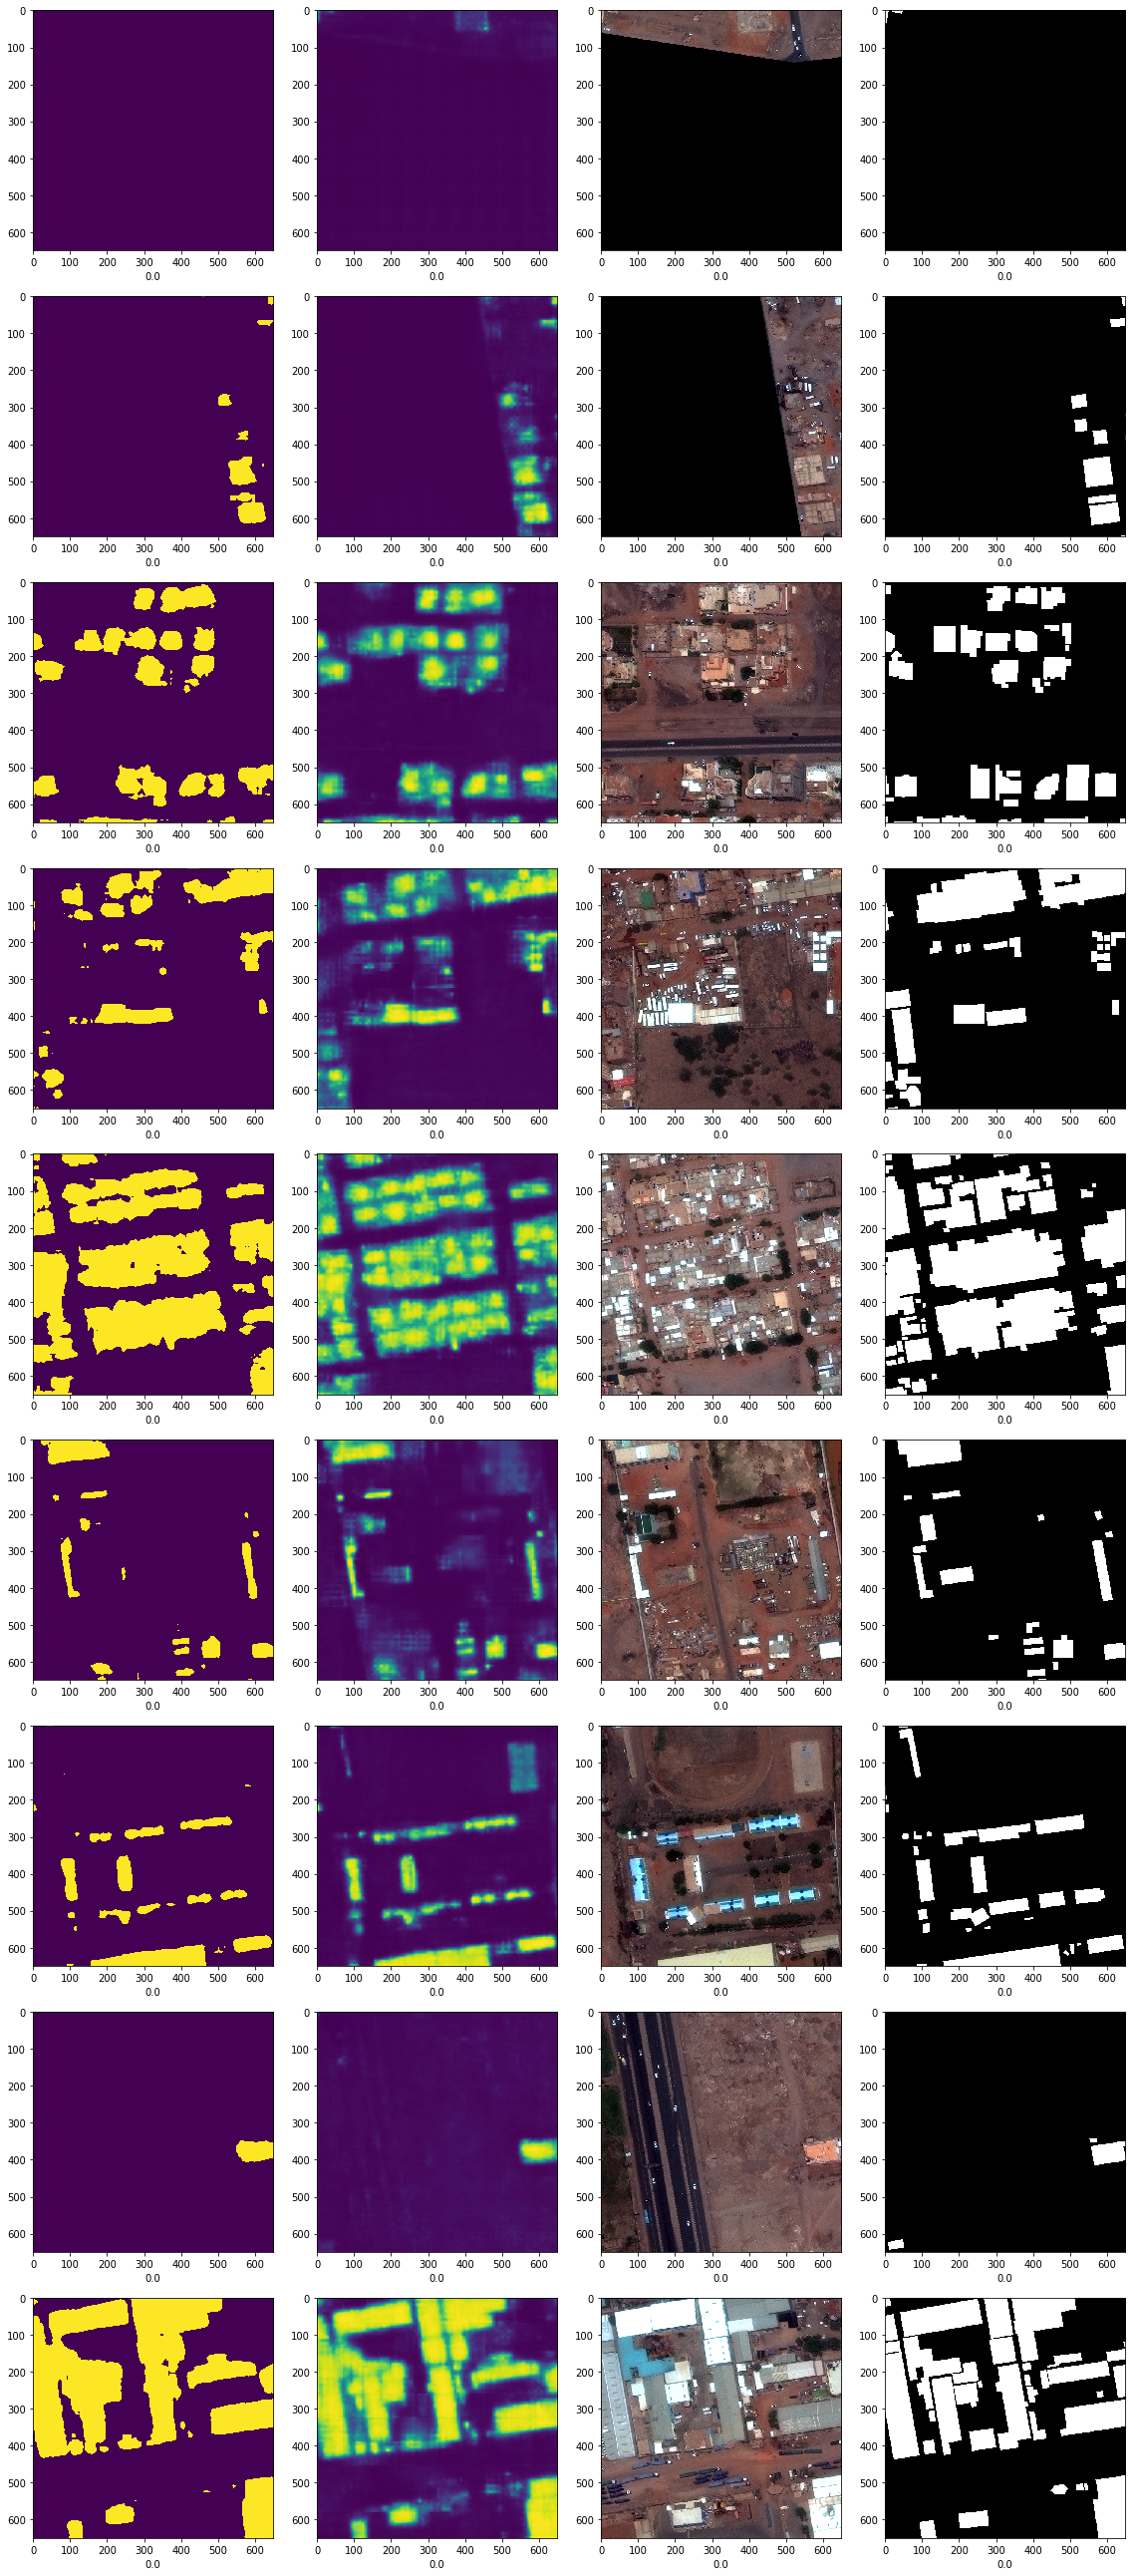

In [24]:
idx = 119
num_ims = 9
data_im = zip(slice_only[idx:idx + num_ims] > 0.5, slice_only[idx:idx + num_ims], val_x[idx:idx + num_ims], 
              val_y[idx:idx + num_ims])
# data_im = [avg[idx:idx + 9]]
plot_ims(data_im, figsize=4)

# Watershed

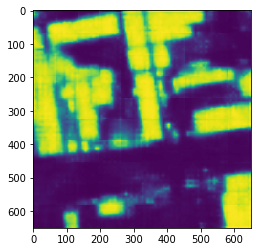

In [58]:
img = (slice_only[idx + 8] * 255).astype('uint8')
plt.imshow(img)

In [95]:
plt.imsave('5-1.png', img)

In [96]:
FileLink('5-1.png')

/data/ywx/building-detection-challenge/5-1.png

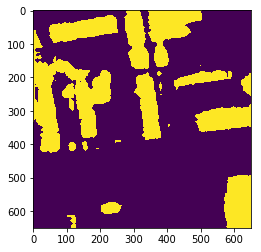

In [83]:
ret, thresh = cv2.threshold(img[..., None],255//1.2,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

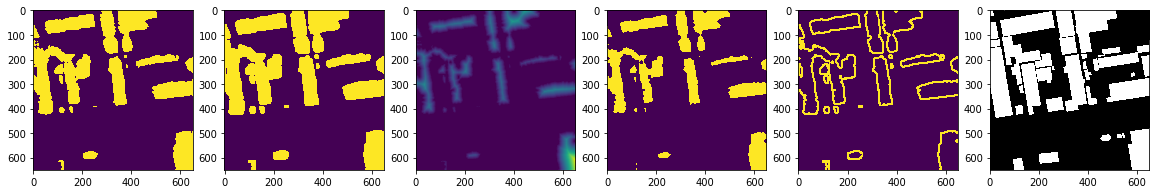

In [94]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

fig, ax = plt.subplots(1,6, figsize=(20, 20))
ax[0].imshow(opening)
ax[1].imshow(sure_bg)
ax[2].imshow(dist_transform)
ax[3].imshow(sure_fg)
ax[4].imshow(unknown)
ax[5].imshow(val_y[idx + 8])

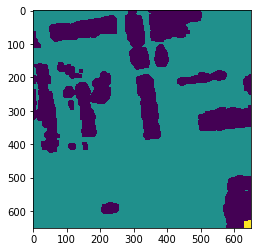

In [80]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

In [82]:
markers = cv2.watershed(img,markers)
img[markers == -1] = 255
plt.imshow(img)

error: /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed


# crf

In [ ]:
crfed = dense_crf((x_big[idx] * 255).astype('uint8'), (preds_big[idx]),
                             sxy1=1, sxy2=1, srgb=1)

# Submission

In [ ]:
%%time
%run script 3 --num_gpus=1 --gpu_start=9 --bs=40 --test --num_slice 81  --model_name unet